In [48]:
#Name: Sapna Bharti
#Problem statement: Build cnn model for a_z handwritten letters 
#Date: 18-05-2022

#Importing required libraries
import cv2
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
#Read csv file and creating a dataframe
given_dataset = pd.read_csv("A_Z_Handwritten_Data.csv").astype("float32")

In [50]:
#First five rows of dataset
given_dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#Last five rows of dataset
given_dataset.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#Information about the dataset
given_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [53]:
#renaming 0th column of data set as label
given_dataset.rename(columns={'0': "label"}, inplace=True)

In [54]:
#selecting only those labels which are unique from string 'QUALITAS TECHNOLOGIES PVT LTD' ie 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'L', 'N', 'O', 'P', 'Q', 'S', 'T', 'U', 'V'
#selecting on the basis 0-25 
updated_dataset=given_dataset.loc[(given_dataset['label'].isin([0,2,3,4,6,7,8,11,13,14,15,16,18,19,20,21]))]

In [55]:
updated_dataset

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338454,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338455,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338456,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338457,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# how many labels do we have 
updated_dataset.label.nunique()

16

In [57]:
#x and y represents data and label
x = updated_dataset.drop("label", axis=1)
y = updated_dataset["label"]

c:\users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


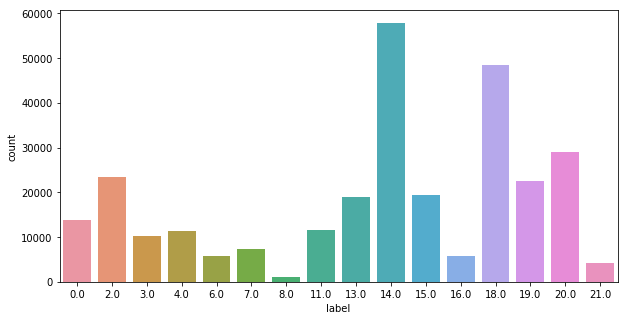

In [58]:
# graph to check the count of the selected letters
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,5))
sns.countplot(y)

In [59]:
from imblearn.under_sampling import RandomUnderSampler  #to balance imbalnced dataset , undersampling majority class

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(x, y)

c:\users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


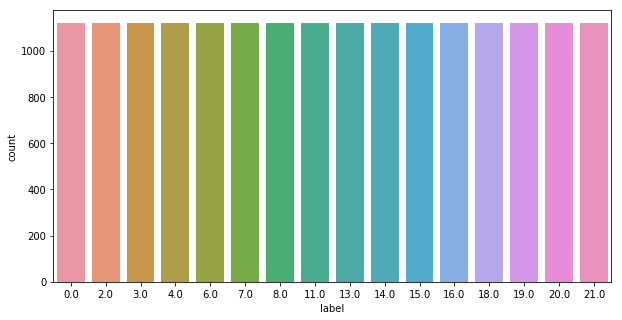

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(y_res)

In [71]:
from sklearn.preprocessing import LabelBinarizer  #accepts Categorical data as input and returns an Numpy array
lb = LabelBinarizer()
y_data = lb.fit_transform(y_res)
y_data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [72]:
print(X_res.shape,y_data.shape)

(17920, 784) (17920, 16)


In [74]:
#Normalizing each pixels
X_res = X_res / 255
X_res

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_res = np.array(X_res)

In [76]:
X_res = X_res.reshape(-1,28,28,1)

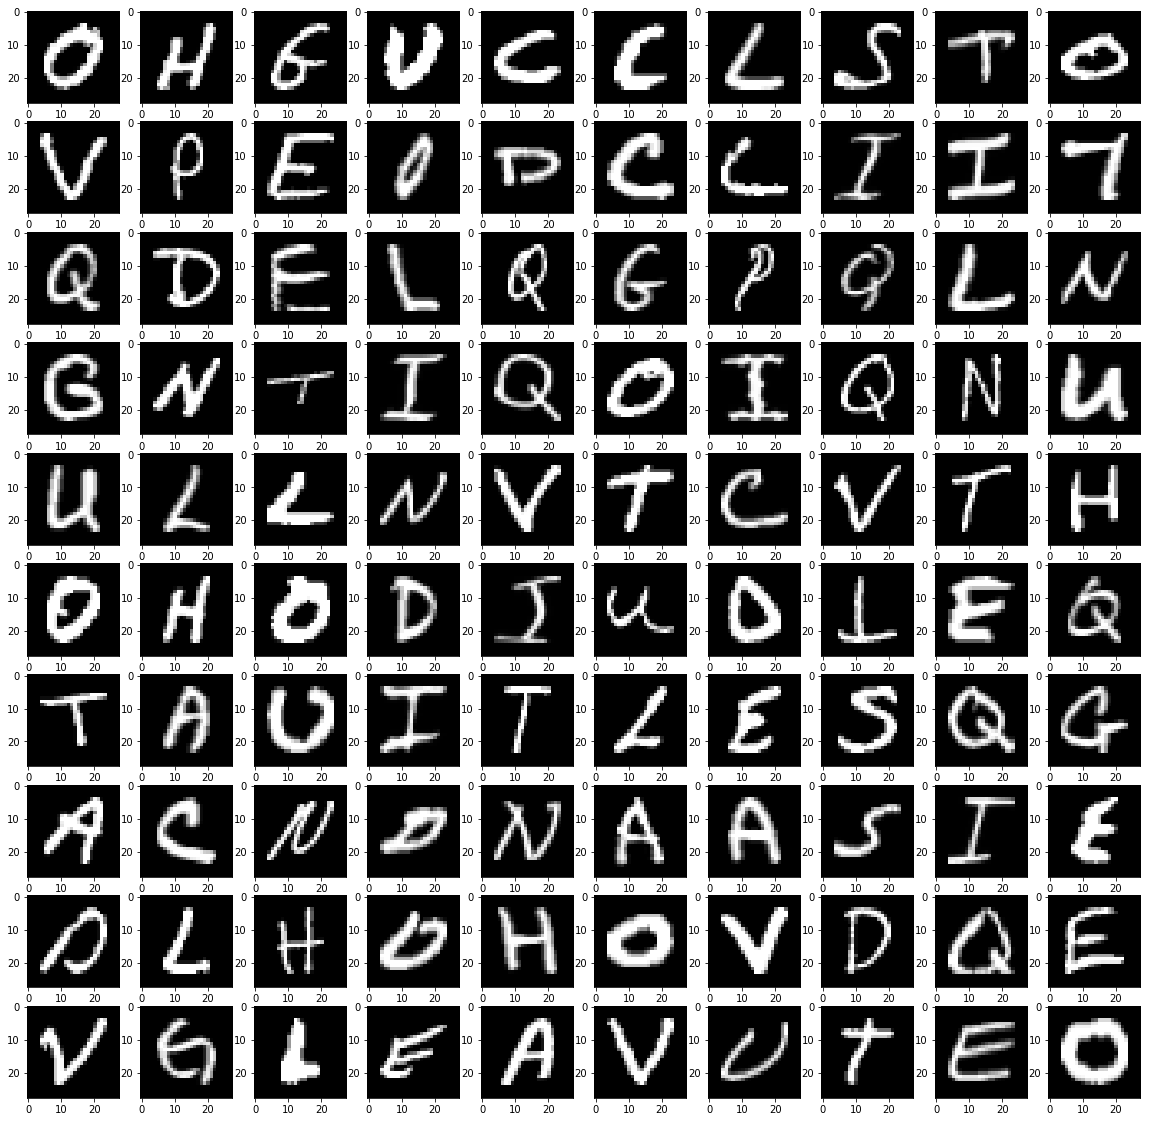

In [77]:
#Visualizing radom 100 images of alphabets using matplotlib
shuffled_data = shuffle(X_res)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [79]:
#splitting tha data into train test with 80-20% respectively
X_train, X_test, y_train, y_test = train_test_split(X_res, y_data, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((11468, 28, 28, 1),
 (3584, 28, 28, 1),
 (2868, 28, 28, 1),
 (11468, 16),
 (3584, 16),
 (2868, 16))

In [81]:
#Data Augmentation , so that we can save us from overfitting
from keras.preprocessing.image import ImageDataGenerator
dataGen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
dataGen.fit(X_train)

In [83]:
from keras.callbacks import ReduceLROnPlateau  #Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
                                            verbose=1,factor=0.5, min_lr=0.00001)

In [84]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [89]:
#creating CNN model
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))

model.add(Dropout(0.3))
model.add(Dense(units = 16 , activation = 'softmax')) ##16 as no of neurons in outputlayer should be equal to number of labels
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 50)         

In [90]:
#Model_Summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 50)         

In [164]:
#Trainig the model
history = model.fit(dataGen.flow(X_train,y_train, batch_size = 128) ,epochs = 4 , 
                    validation_data = (X_valid, y_valid) , 
                    callbacks = [learning_rate_reduction])

Epoch 1/4
90/90 [==============================] - 65s 718ms/step - loss: 0.1082 - accuracy: 0.9644 - val_loss: 0.1192 - val_accuracy: 0.9641
Epoch 2/4
90/90 [==============================] - 69s 765ms/step - loss: 0.0959 - accuracy: 0.9685 - val_loss: 0.0850 - val_accuracy: 0.9770
Epoch 3/4
90/90 [==============================] - 74s 819ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.1072 - val_accuracy: 0.9679
Epoch 4/4
90/90 [==============================] - 66s 739ms/step - loss: 0.0856 - accuracy: 0.9727 - val_loss: 0.0725 - val_accuracy: 0.9794


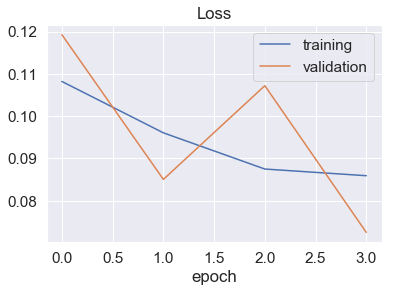

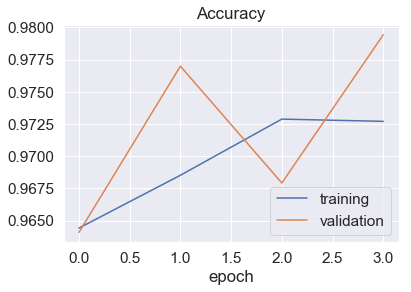

In [166]:
#loss and accuracy graph for training and validation
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [167]:
score = model.evaluate(X_test,y_test,verbose=0)
print('loss = ',score[0])
print('Accuracy =', score[1])

loss =  0.05327698747922633
Accuracy = 0.9835379719734192


In [168]:
#Testing our model
predictions = model.predict(X_test)


In [169]:
confusion = confusion_matrix(
    np.argmax(y_test, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[249   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0 221   0   0   0   0   0   2   0   0   1   0   0   0   0   0]
 [  0   0 226   0   0   0   0   0   0   9   1   0   0   0   0   1]
 [  0   4   0 206   2   0   0   0   0   0   0   0   0   0   1   0]
 [  0   1   0   2 206   0   1   0   0   0   0   1   1   0   0   0]
 [  1   0   0   0   0 228   0   1   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0 239   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0 216   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   1   0 217   0   0   0   0   1   0]
 [  1   0   0   0   1   0   0   0   0   0 218   1   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   2   1 195   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 227   0   0   0]
 [  0   0   0   0   0   0   0   1   0   1   0   0   0 222   0   0]
 [  0   1   0   0   1   0   0   0   1   0   0   0   0   1 230 

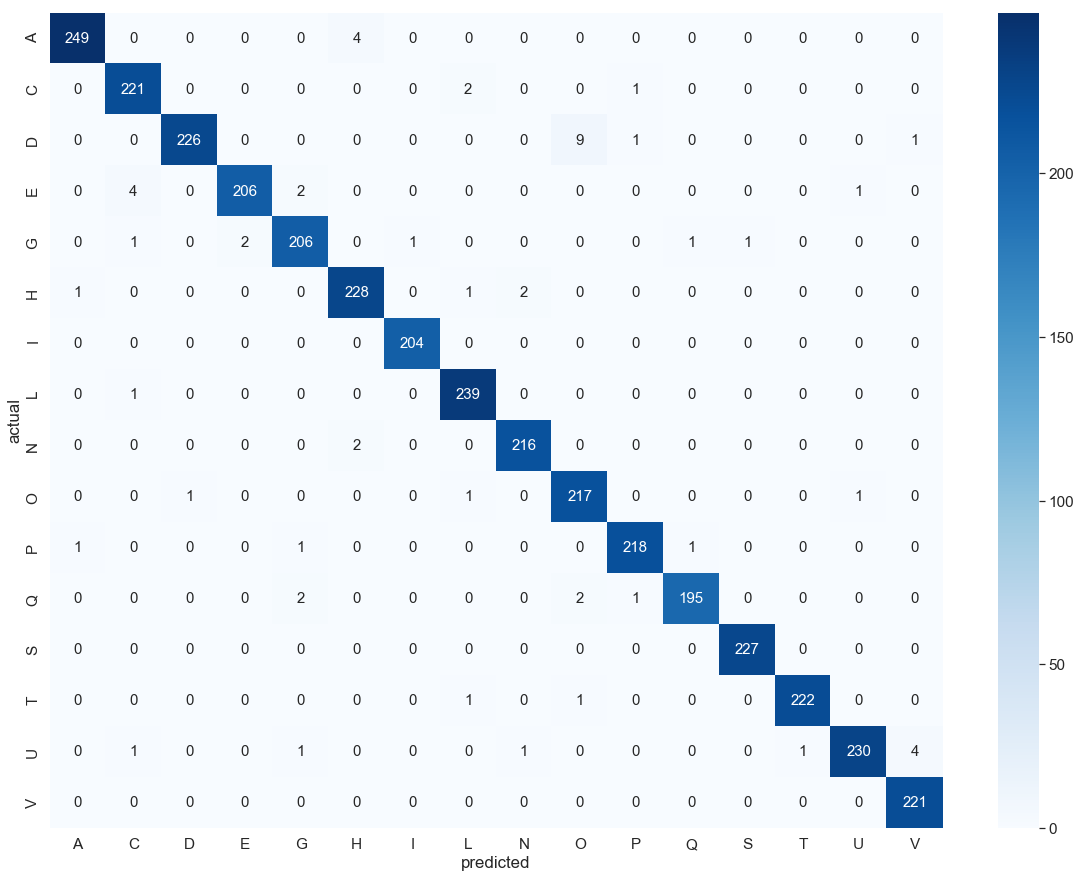

In [170]:
#Confusion matrix to describe the performance of the classification model
import seaborn as sn
labels = ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'L', 'N', 'O', 'P', 'Q', 
          'S', 'T', 'U', 'V']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")